# 캘리포니아 집값 예측

## 패키지로딩

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터로드 및 확인

In [4]:
import warnings
warnings.filterwarnings(action='ignore')
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
display(df.head())

x = df.drop(['Latitude','Longitude'],axis =1)
y = data.target # 전체데이터의 종속변수 가져온당

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 데이터 스케일링

In [5]:
scaled_data = StandardScaler().fit_transform(x)
print(scaled_data)
scaled_data_df = pd.DataFrame(scaled_data,columns=data.feature_names[:6])
display(scaled_data_df.head())
print(scaled_data_df.describe())

[[ 2.34476576  0.98214266  0.62855945 -0.15375759 -0.9744286  -0.04959654]
 [ 2.33223796 -0.60701891  0.32704136 -0.26333577  0.86143887 -0.09251223]
 [ 1.7826994   1.85618152  1.15562047 -0.04901636 -0.82077735 -0.02584253]
 ...
 [-1.14259331 -0.92485123 -0.09031802  0.04941393 -0.3695372  -0.0717345 ]
 [-1.05458292 -0.84539315 -0.04021111  0.15877763 -0.60442933 -0.09122515]
 [-0.78012947 -1.00430931 -0.07044252  0.1384028  -0.03397701 -0.04368215]]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean   6.609700e-17  5.508083e-18  6.609700e-17 -1.060306e-16 -1.101617e-17   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -1.774299e+00 -2.196180e+00 -1.852319e+00 -1.610768e+00 -1.256123e+00   
25%   -6.881186e-01 -8.453931e-01 -3.994496e-01 -1.911716e-01 -5.638089e-01   
50%   -1.767951e-01  2.864572e-02 -8.078489e-02 -1.010650e-01 -2.291318e-01   
75%    4.593063e-01  6.643103e-01  2.519615e-01  6.015869e-03  2.644949e-01   
max    5.858286e+00  1.856182e+00  5.516324e+01  6.957171e+01  3.025033e+01   

           AveOccup  
count  2.064000e+04  
mean   3.442552e-18  
std    1.000024e+00  
min   -2.290000e-01  
25%   -6.171062e-02  
50%   -2.431585e-02  
75%    2.037453e-02  
max    1.194191e+02  


# 변수간 상관관계 시각화

In [6]:
import seaborn as sns

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000


<Axes: >

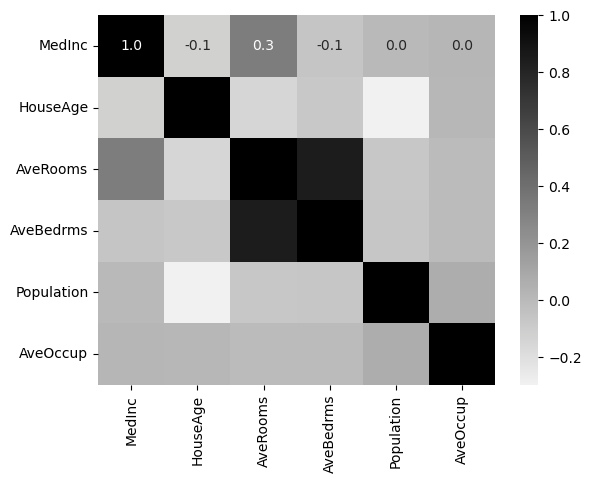

In [7]:
corr = scaled_data_df.corr() #변수간 상관관계 값 산출
print(corr)
cmap = sns.light_palette('black',as_cmap=True)
sns.heatmap(corr,annot=True,fmt='3.1f',cmap=cmap)

## 학습/평가 데이터 분할

### 표준화된 데이터 분할

In [8]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data,y,test_size=0.3,random_state=10)

### 표준화 하지 않은 데이터 분할

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

## 회귀모델 생성 및 학습

In [10]:
model = LinearRegression()
model.fit(x_train,y_train)
LinearRegression()

LinearRegression()

## 모델 예측 및 검증

In [12]:
y_hat = model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
y_hat = model.predict(x_test)
mse = mean_squared_error(y_test,y_hat)
print(f'MSE{mse:.3f}')
print(f'RMSE{np.sqrt(mse):.3f}')
print(f'결정계수{r2_score(y_test,y_hat):.3f}')

MSE0.634
RMSE0.796
결정계수0.532


In [13]:
weight = { f:w for f, w in zip (x.columns, model.coef_)}
print('추정계수(가중치)')
print(pd.Series(weight).sort_values(ascending=False))

추정계수(가중치)
AveBedrms     1.103587
MedInc        0.542363
HouseAge      0.016855
Population    0.000027
AveOccup     -0.005831
AveRooms     -0.216814
dtype: float64


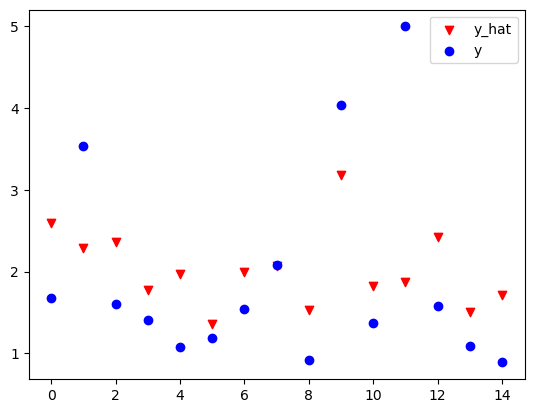

In [14]:
plt.scatter(np.arange(15),y_hat[:15],marker='v', color='r',label = 'y_hat')
plt.scatter(np.arange(15),y_test[:15],marker='o', color='b',label = 'y')
plt.legend()
plt.show()

# 학습곡선 시각화

In [15]:
# 학습 데이터의 크기 변화에 따른 학습과 평가의 오차변화 시각화
from sklearn.metrics import mean_squared_error
def plot_learning_curve(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)
    train_error = []
    test_error = []
    for n in range(1, len(x)+10):
        model.fit(x_train[:n], y_train[:n])
        y_train_hat = model.predict(x_train[:n])
        y_test_hat = model.predict(x_test[:n])
        train_error.append(mean_squared_error(y_train[:n],y_train_hat))
        test_error.append(mean_squared_error(y_test[:n], y_test_hat))
    plt.plot(np.sqrt(train_error), 'r', label = 'train')
    plt.plot(np.sqrt(test_error), 'b', label = 'test')
    plt.xlabel('training set size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

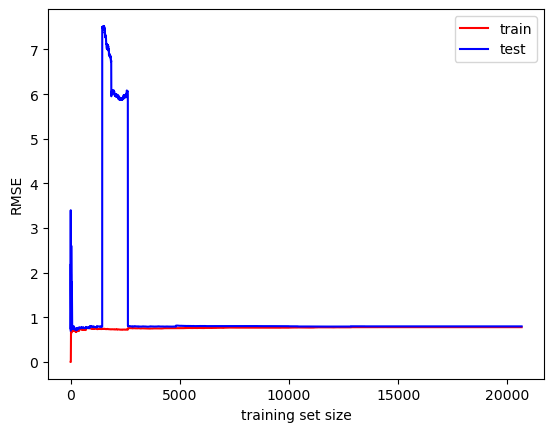

In [16]:
model = LinearRegression()
plot_learning_curve(model, x, y)

# 다중공선성 및 변수선택 후 학습
- VIF 값 확인

In [1]:
!pip install statsmodels

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
print(vif)

   VIF Factor    features
0    1.094793    AveOccup
1    2.322315  Population
2    4.309941    HouseAge
3    7.766787      MedInc
4   34.118257   AveBedrms
5   41.111592    AveRooms


# 분산팽창지수가 높은 변수 삭제

In [ ]:
x = x.drop('AveBedrms', axis=1)
scaled_data = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [24]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [25]:
r_square = model.score(x_test,y_test)
print(f'결정계수: {r_square:.2f}')

결정계수: 0.52


[문제] 강남역 전철 출근시간(07~08) 승하차 인원 예측하기
- 패키지 로딩
- 데이터 로딩 및 확인 (결측치)
- 데이터 전처리
    >- 'Date'컬럼 삭제
    >- 'Type'컬럼 인코딩
    >- 'DoW'컬럼 인코딩
- 독립변수와 종속변수 분리
- 학습데이터와 평가데이터 분리
- 모델 생성 및 예측
- 모델 평가 (R2, MSE, RMSE)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [28]:
# 데이터 불러오기
df = pd.read_csv("GangnamTrainData.csv")
print(df.isna().sum())

# 'Date' 열 제거
df.drop('Date', axis=1, inplace=True)

# 'Type'을 원-핫 인코딩
df_train = pd.get_dummies(df['Type'])

# 'DoW'를 라벨링
week = np.sort(df['DoW'].unique())
df_train['DoW'] = df['DoW'].map({w: i for i, w in enumerate(week)})

# Feature와 Target 데이터 지정
x = df_train
y = df['07 ~ 08']  # 원본 데이터에서 타겟 값 가져오기

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 모델 정확도 평가
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# 예측 결과 출력
predictions = model.predict(X_test)
print("Predictions:", predictions)

# 추가 평가 지표 계산
r_square = model.score(X_test, y_test)
print(f'결정계수:{r_square:.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,predictions)):.2f}')
print(f'07-08시 평균 승하차 인원:{np.mean(y):.2f}')

Date       0
Type       0
DoW        0
05 ~ 06    0
06 ~ 07    0
07 ~ 08    0
08 ~ 09    0
09 ~ 10    0
10 ~ 11    0
11 ~ 12    0
12 ~ 13    0
13 ~ 14    0
14 ~ 15    0
15 ~ 16    0
16 ~ 17    0
17 ~ 18    0
18 ~ 19    0
19 ~ 20    0
20 ~ 21    0
21 ~ 22    0
22 ~ 23    0
23 ~ 24    0
00 ~ 01    0
01 ~ 02    0
dtype: int64
Model Accuracy: 0.8627087794998647
Predictions: [7556.11622441 2026.20812876 7399.58635055 1973.92396357 2089.5073124
 7171.04939111 1851.2461472  7399.58635055 1851.2461472  7556.11622441
 1938.40507095 2089.5073124  1938.40507095  824.6887379  1973.92396357
 2089.5073124  1938.40507095 1851.2461472  1973.92396357  824.6887379
 1973.92396357 1620.0774451  7774.51654793 2026.20812876  853.19275038
  853.19275038 2026.20812876 7774.51654793  853.19275038 2026.20812876
 1851.2461472  1938.40507095 7833.51112934 7399.58635055 7399.58635055
  593.91159772 1620.0774451  2026.20812876 7556.11622441  824.6887379
  853.19275038 7171.04939111  824.6887379   853.19275038 1620.

# 보스턴 집값 예측

## 패키지 로딩

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd

# 데이터 로드 및 확인
- CRIM : 범죄율
- ZN : 25,000 평피트를 초과하는 거주지역 비율
- INDUS : 상업지역 면적 비율
- CHAS : 찰스강 경계 위치
- NDX : 일산화질소 농도
- RM : 주택당 방 수
- AGE : 주택연령
- DIS : 직업센터까지 거리
- RAD : 고속도로까지의 거리
- TAX : 재산세율
- PTRATIO : 학생과 교사 비율
- B : 인구 중 흑인 비율
- LSTAT : 인구 중 하위계층 비율
- MEDV : 주택가격(종속변수)

In [47]:
df = pd.read_csv('./데이터셋/HousingData.csv')
# 결측치 처리
df.dropna(inplace=True)
display(df.head())
x = df.drop('MEDV',axis=1)
y = df['MEDV']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [48]:
print(df.describe())
print(df.isna().sum())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean     3.690136   11.460660   11.000863    0.068528    0.553215    6.280015   
std      9.202423   23.954082    6.908364    0.252971    0.113112    0.697985   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.081955    0.000000    5.130000    0.000000    0.453000    5.879250   
50%      0.268880    0.000000    8.560000    0.000000    0.538000    6.201500   
75%      3.435973   12.500000   18.100000    0.000000    0.624000    6.605500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean    68.932741    3.805268    9.403553  406.431472   18.537563  358.490939   
std     27.888705    2.0985

## 학습/평가 데이터 분할

### 스케일링 된 데이터 분할

In [49]:
scaled_data = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=10)

### 스케일링 안된 데이터 분할

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

## 알파값 변화에 따른 회귀계수 및 상관계수 값 계산

## 알파값 변화에 따른 회귀계수 및 상관계수 값 계산
- 알파값은 규제강도를 제어하는 상수로 [0,int) 범위의 부동 소수점 값을 사용할 수 있다.
- alpha=0 이면 LinearRegression에서 사용되는 일반적인 최소제곱법과 같아진다.

In [59]:
def regulation_compare (alpha, model_name):
    df = pd.DataFrame()
    for a in alpha:
        print('회귀모형:',model_name)
        print('알파값:',a)

        if model_name == 'Lasso':
            model = Lasso(alpha=a)
        elif model_name == 'Ridge':
            model = Ridge(alpha=a)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=a,l1_ratio=0.5)
        model.fit(x_train, y_train)
        r_square = model.score(x_test,y_test)
        print(f'결정계쑤:{r_square:.2f}')
        weight = {f:w for f,w in zip(x.columns, model.coef_)}
        y_hat = model.predict(x_test)
        print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_hat)):.2f}')
        df['alpha='+str(a)] = pd.Series(weight)
    return df

## 라쏘 회귀모델 생성 ( L1규제)

In [61]:
# 알파값이 커질수록 제거되는 항이 많아져 결정계수의 값이 낮아지는 결과
# 독립변수로 사용되는 14개의 특성값이 집 값을 결정짓는 중요한 요소를 하고있는 것으로 판단
alpha = [0,0.07,0.1,9.8,1.3]
regulation_compare(alpha,'Lasso')

회귀모형: Lasso
알파값: 0
결정계쑤:0.78
RMSE:3.50
회귀모형: Lasso
알파값: 0.07
결정계쑤:0.78
RMSE:3.47
회귀모형: Lasso
알파값: 0.1
결정계쑤:0.78
RMSE:3.47
회귀모형: Lasso
알파값: 9.8
결정계쑤:0.52
RMSE:5.17
회귀모형: Lasso
알파값: 1.3
결정계쑤:0.68
RMSE:4.23


,alpha=0,alpha=0.07,alpha=0.1,alpha=9.8,alpha=1.3
CRIM,-0.106486,-0.092427,-0.092260,-0.000000,-0.049286
ZN,0.052928,0.058980,0.059567,0.038954,0.063294
INDUS,0.001940,-0.079933,-0.073311,-0.000000,-0.000000
CHAS,3.665629,2.311969,1.830581,0.000000,0.000000
NOX,-22.298586,-0.000000,-0.000000,0.000000,-0.000000
RM,3.753820,3.726716,3.656931,0.000000,0.408483
AGE,-0.010788,-0.026374,-0.024769,0.000000,0.015319
DIS,-1.653172,-1.307589,-1.293585,-0.000000,-0.655532
RAD,0.348607,0.299485,0.302712,0.000000,0.265699
TAX,-0.015921,-0.018305,-0.018590,-0.011863,-0.019444


## 릿지 회귀모델 사용(l2규정 사용)

In [62]:
alpha = [0,1,5,10,100]
regulation_compare(alpha,'Ridge')

회귀모형: Ridge
알파값: 0
결정계쑤:0.78
RMSE:3.50
회귀모형: Ridge
알파값: 1
결정계쑤:0.79
RMSE:3.44
회귀모형: Ridge
알파값: 5
결정계쑤:0.79
RMSE:3.47
회귀모형: Ridge
알파값: 10
결정계쑤:0.78
RMSE:3.50
회귀모형: Ridge
알파값: 100
결정계쑤:0.74
RMSE:3.80


,alpha=0,alpha=1,alpha=5,alpha=10,alpha=100
CRIM,-0.106486,-0.098989,-0.095897,-0.095761,-0.093036
ZN,0.052928,0.055982,0.058614,0.060075,0.065512
INDUS,0.001940,-0.052383,-0.077356,-0.080624,-0.084117
CHAS,3.665629,3.336114,2.679254,2.182534,0.544736
NOX,-22.298586,-9.501731,-2.865365,-1.520838,-0.145625
RM,3.753820,3.791013,3.670303,3.490921,1.830721
AGE,-0.010788,-0.021339,-0.025173,-0.024268,-0.005687
DIS,-1.653172,-1.474036,-1.381711,-1.360840,-1.184691
RAD,0.348607,0.318864,0.310956,0.315844,0.351776
TAX,-0.015921,-0.017058,-0.018044,-0.018572,-0.020522


## 엘라스틱 회귀모델 생성 (L1 + L2)

# [실습] 대한민국 육군 몸무게 예측

In [ ]:
- 다음 3가지 회귀모형 결과 비교하기
>- 일반 선형회귀
>- L1 규제가 적용된 Lasso 모형(알파값 1)
>- L2 규제가 적용된 Ridge 모형(알파값 10)
>- 평가지표: 결정계수, MAE, RMSE

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv("./데이터셋/Army-Dataset.csv")
df.drop('Seq', axis=1, inplace=True)
x = df.loc[:,'Chest':'Foot'] # df.drop('weight',axis=1)
y = df['Weight']

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=10)
model = LinearRegression()
lasso = Lasso(alpha=1)
ridge = Ridge(alpha=10)

model.fit(x_train, y_train)
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

linearhat = model.predict(x_test)
lassohat = lasso.predict(x_test)
ridgehat = ridge.predict(x_test)

r_square = model.score(x_test, y_test)
lasso_square = lasso.score(x_test, y_test)
ridge_square = ridge.score(x_test, y_test)
print(r_square)
print(lasso_square)
print(ridge_square)


print(f'RMSE:{(mean_squared_error(y_test,linearhat)):.2f}')
print(f'RMSE:{(mean_squared_error(y_test,lassohat)):.2f}')
print(f'RMSE:{(mean_squared_error(y_test,ridgehat)):.2f}')


print(f'MAE:{mean_absolute_error(y_test,linearhat):.2f}')
print(f'MAE:{mean_absolute_error(y_test,lassohat):.2f}')
print(f'MAE:{mean_absolute_error(y_test,ridgehat):.2f}')

0.8851306594230461
0.8834842331462016
0.88513071873077
RMSE:21.98
RMSE:22.30
RMSE:21.98
MAE:3.54
MAE:3.55
MAE:3.54


## 알파값 변화에 따른 모델 성능 변화 시각화

In [99]:
ridge_result = []
lasso_result = []
alpha = [0.001, 0.01,0.1,1,5,7,10,30]

for a in alpha:
    ridge = Ridge(alpha=a)
    lasso = Lasso(alpha=a)

    ridge.fit(x_train,y_train)
    lasso.fit(x_train,y_train)

    ridge_r2 = ridge.score(x_test, y_test)
    lasso_r2 = lasso.score(x_test, y_test)
    ridge_result.append(ridge_r2)
    lasso_result.append(lasso_r2)

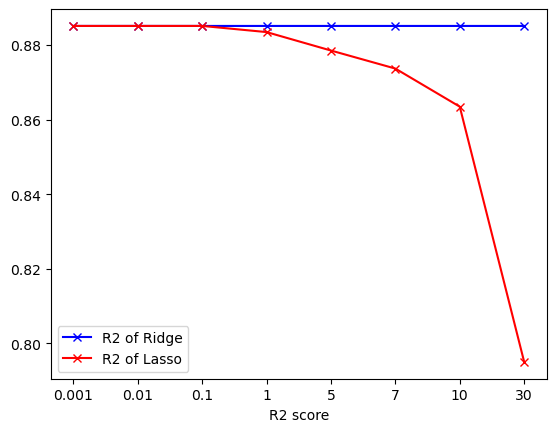

In [101]:
import matplotlib.pyplot as plt
plt.plot(range(len(alpha)), ridge_result, '-xb', label = 'R2 of Ridge')
plt.plot(range(len(alpha)), lasso_result, '-xr', label = 'R2 of Lasso')
plt.xticks(range(len(alpha)), alpha)
plt.xlabel('Alpha')
plt.xlabel('R2 score')
plt.legend()
plt.show()